In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense

# Rede Neural - Autoencoder

In [2]:
# Importando bade de dados
(previsores_treinamento, _), (previsores_teste, _) = mnist.load_data()

In [3]:
# Convertendo e normalizando dados
previsores_treinamento = previsores_treinamento.astype('float32') / 255
previsores_teste = previsores_teste.astype('float32') / 255

In [4]:
# Realisando redimencinamento 
previsores_treinamento = previsores_treinamento.reshape((len(previsores_treinamento), np.prod(previsores_treinamento.shape[1:])))
previsores_teste = previsores_teste.reshape((len(previsores_teste), np.prod(previsores_teste.shape[1:])))

In [20]:
# Criando estrutura da rede neural
autoencoder = Sequential()
autoencoder.add(Dense(units = 32, activation = 'relu', input_dim = 784))
autoencoder.add(Dense(units = 784, activation = 'sigmoid'))
# Compilando rede neural
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Treinamento e teste do modelo
autoencoder.fit(previsores_treinamento, 
                previsores_treinamento, 
                epochs = 50, 
                batch_size = 256,
                validation_data = (previsores_teste, previsores_teste))

Epoch 1/50
235/235 [==============================] - 2s 8ms/step - loss: 0.3839 - accuracy: 0.0114 - val_loss: 0.1857 - val_accuracy: 0.0128
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1774 - accuracy: 0.0149 - val_loss: 0.1522 - val_accuracy: 0.0144
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1476 - accuracy: 0.0125 - val_loss: 0.1311 - val_accuracy: 0.0105
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1296 - accuracy: 0.0100 - val_loss: 0.1188 - val_accuracy: 0.0096
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1183 - accuracy: 0.0100 - val_loss: 0.1106 - val_accuracy: 0.0104
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1108 - accuracy: 0.0110 - val_loss: 0.1053 - val_accuracy: 0.0112
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1052 - accuracy: 0.0109 - val_loss: 0.1014 - val_accuracy: 0.0116
Epoch 

In [22]:
# Resumo do modelo criado autoencoder
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Encoder baseado no modelo autoencoder
dimensao_original = Input(shape = (784,))
camada_encoder = autoencoder.layers[0]
encoder = Model(dimensao_original, camada_encoder(dimensao_original))

In [24]:
# Resumo do modelo criado encoder
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Testando enconder e decoder
imagens_codificadas = encoder.predict(previsores_teste)
imagens_decodificadas = autoencoder.predict(previsores_teste)

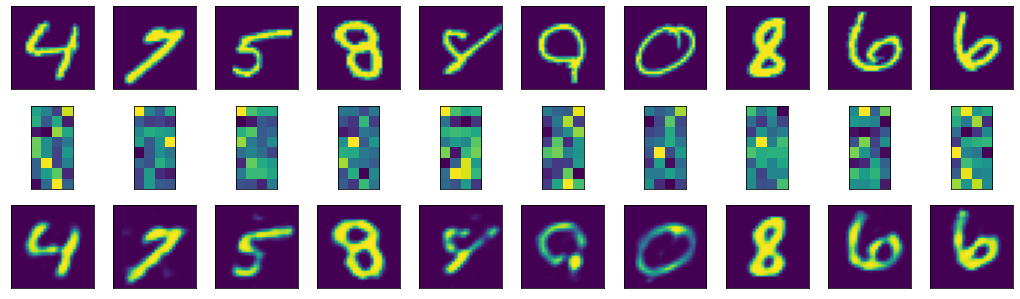

In [26]:
# Visualizando resultados
numero_imagens = 10
imagens_teste = np.random.randint(previsores_teste.shape[0], size = numero_imagens)

plt.figure(figsize = (18, 18))

for i, indice_imagem in enumerate(imagens_teste):
    
    # Imagem original
    eixo = plt.subplot(10, 10, i + 1)
    plt.imshow(previsores_teste[indice_imagem].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())
    
    # Imagem codificada
    eixo = plt.subplot(10, 10, i + 1 + numero_imagens)
    plt.imshow(imagens_codificadas[indice_imagem].reshape(8, 4))
    plt.xticks(())
    plt.yticks(())
    
    # Imagem reconstruída
    eixo = plt.subplot(10, 10, i + 1 + numero_imagens * 2)
    plt.imshow(imagens_decodificadas[indice_imagem].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())